In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ../data/

/Users/dorislee/Desktop/Research/viz/viz-summarization/data


In [4]:
ls

2010_Census_Populations_by_Zip_Code.csv  ACS_Download.py                          g20145fl.csv
ACS_5yr_Seq_Table_Number_Lookup.txt      FL/                                      g20145ny.csv
ACS_Download copy.py                     NY/                                      joined_cleaned_primary.csv


In [5]:
import glob
from state_dict import states
import pandas as pd 

*_MOE is measurment of error which we don't need. *_EST is the estimated value, this is an estimate because obviously they don't have the resources to go and sample everyone in the US every year. Therefore, they do some clever sampling and agggregate the results over many year, so the 5-year estimate that we are using reflects the more precise estimate aggregated over 5 years. 

In [105]:
df_stack=[]
for state_abbrev in states.keys(): 
    df_tbl = None
    datafiles = glob.glob("{}/*.csv".format(state_abbrev))
    if len(datafiles)!=0:
        for data in datafiles: 
            df = pd.read_csv(data)
            #df=df[df.keys()[6:]]
            df = df[['NAME']+list(df.filter(regex='EST').keys())]
            df["state_abbrev"] = state_abbrev
            df["state_name"] = states[state_abbrev]
            if not np.isnan(df.ix[0][1]):
                if df_tbl is None:
                    df_tbl = df
                else:
                    df_tbl = df_tbl.merge(df)    
            else:
                print "Bad: ",data
        df_stack.append(df_tbl)
df_all = pd.concat(df_stack)

In [110]:
df_all["NAME"]=df_all["NAME"].apply(lambda x : x.split(',')[0])

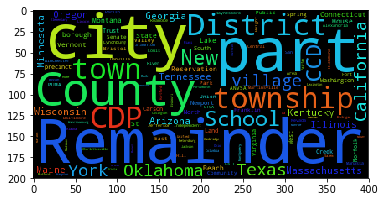

In [139]:
import wordcloud
import string
names = string.join(list(df_all["NAME"]))
wc  =wordcloud.WordCloud().generate(names)
plt.imshow(wc)

In [159]:
col_names = df_all.filter(regex="EST").keys()
col = col_names[0]

lookup_colname = pd.read_csv("ACS_5yr_Seq_Table_Number_Lookup.txt")

~~We can ignore all the "Total" columns because these are just aggregates that we can compute from the data~~

In [205]:
col_dict={}
for col in col_names:
    table, line , EST= col.split("_")
    if line =='1': 
        selected_table = lookup_colname[(lookup_colname["Table ID"]==table)]
        full_column_name = selected_table[selected_table["Table Title"].str.contains("Universe")]["Table Title"].values[0].split(':')[-1].lstrip()
    else: 
        full_column_name=lookup_colname[(lookup_colname["Table ID"]==table)&(lookup_colname["Line Number"]==line)]["Table Title"].values[0]
    col_dict[col]=full_column_name
    # print full_column_name

In [212]:
df_all = df_all.rename(index=str,columns=col_dict)

In [268]:
df_all.to_csv('census.csv')

In [277]:
rm census.sqlite

In [255]:
df_all = df_all.dropna()

In [278]:
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///census.sqlite',convert_unicode=True,encoding = 'utf')

In [279]:
df_all.to_sql("census",engine)

ProgrammingError: (sqlite3.ProgrammingError) You must not use 8-bit bytestrings unless you use a text_factory that can interpret 8-bit bytestrings (like text_factory = str). It is highly recommended that you instead just switch your application to Unicode strings. [SQL: u'INSERT INTO census ("index", "NAME", "Total population", state_abbrev, state_name, "Male:", "Under 5 years", "5 to 9 years", "10 to 14 years", "15 to 17 years", "18 and 19 years", "20 years", "21 years", "22 to 24 years", "25 to 29 years", "30 to 34 years", "35 to 39 years", "40 to 44 years", "45 to 49 years", "50 to 54 years", "55 to 59 years", "60 and 61 years", "62 to 64 years", "65 and 66 years", "67 to 69 years", "70 to 74 years", "75 to 79 years", "80 to 84 years", "85 years and over", "Female:", "White alone", "Black or African American alone", "American Indian and Alaska Native alone", "Asian alone", "Native Hawaiian and Other Pacific Islander alone", "Some other race alone", "Two or more races:", "Two races including Some other race", "Two races excluding Some other race, and three or more races", "People who are American Indian and Alaska Native alone and people with no tribe reported", "American Indian tribes, specified:", "Apache", "Blackfeet", "Cherokee", "Cheyenne", "Chickasaw", "Chippewa", "Choctaw", "Colville", "Comanche", "Cree", "Creek", "Crow", "Delaware", "Houma", "Iroquois", "Kiowa", "Lumbee", "Menominee", "Navajo", "Osage", "Ottawa", "Paiute", "Pima", "Potawatomi", "Pueblo", "Puget Sound Salish", "Seminole", "Shoshone", "Sioux", "Tohono O\'Odham", "Ute", "Yakama", "Yaqui", "Yuman", "Other American Indian Tribe", "American Indian tribes, not specified", "Alaska Native tribes, specified:", "Alaskan Athabascan", "Aleut", "Inupiat", "Tlingit-Haida", "Other Alaska Native Tribe", "Alaska Native tribes, not specified", "American Indian tribes or Alaska Native tribes, not specified", "Total Asian alone population", "Asian Indian", "Bangladeshi", "Cambodian", "Chinese , except Taiwanese", "Filipino", "Hmong", "Indonesian", "Japanese", "Korean", "Laotian", "Malaysian", "Pakistani", "Sri Lankan", "Taiwanese", "Thai", "Vietnamese", "Other Asian", "Other Asian, not specified", "Total Native Hawaiian and Other Pacific Islander alone population", "Polynesian:", "Native Hawaiian", "Samoan", "Tongan", "Other Polynesian", "Micronesian:", "Guamanian or Chamorro", "Other Micronesian", "Melanesian :", "Fijian", "Other Melanesian", "Other Pacific Islander", "Other Pacific Islander, not specified (check box only)", "Other Pacific Islander, not specified", "People who are American Indian or Alaska Native alone or in combination with one or more other races", "Native:", "Born in state of residence", "Born in other state in the United States:", "Northeast", "Midwest", "South", "West", "Born outside the United States:", "Puerto Rico", "U.S. Island Areas", "Born abroad of American parent(s)", "Foreign born:", "Naturalized U.S. citizen", "Not a U.S. citizen") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'] [parameters: (('0', 'Washington', 6899123.0, 'WA', 'Washington', 3443508, 216388, 211931, 216799, 130641, 87300, 47923, 46357, 137754, 240304, 237155, 222961, 226752, 233508, 248976, 238439, 90933, 122679, 71979, 88770, 111353, 81330, 66373, 79010, 3455615, 5392302, 250484, 95117, 518072, 42608, 261577, 338963, 33540, 305423, 95117.0, 75945.0, 528.0, 1722.0, 3883.0, 574.0, 396.0, 2941.0, 1345.0, 7297.0, 107.0, 134.0, 528.0, 167.0, 147.0, 19.0, 595.0, 68.0, 117.0, 61.0, 1311.0, 155.0, 36.0, 199.0, 126.0, 344.0, 309.0, 12319.0, 56.0, 37.0, 2569.0, 24.0, 100.0, 7663.0, 168.0, 19.0, 29881.0, 1854.0, 5696.0, 652.0, 1180.0, 1120.0, 2385.0, 359.0, 619.0, 11003.0, 518072.0, 72321.0, 332.0, 20733.0, 101119.0, 91250.0, 1752.0, 3297.0, 36975.0, 63219.0, 10751.0, 355.0, 3726.0, 614.0, 5546.0, 6329.0, 72209.0, 22753.0, 4791.0, 42608.0, 23016.0, 6267.0, 13722.0, 1519.0, 1508.0, 15755.0, 10250.0, 5505.0, 2106.0, 2088.0, 18.0, 359.0, 1284.0, 88.0, 204599.0, 5978429.0, 3265702.0, 2595703.0, 259937.0, 590564.0, 419265.0, 1325937.0, 117024.0, 6532.0, 17036.0, 93456.0, 920694.0, 427201.0, 493493.0), ('1', 'Washington -- Urban', 5816468.0, 'WA', 'Washington', 2892531, 189857, 180100, 181890, 108282, 75756, 42021, 41449, 124086, 217778, 211477, 196137, 193395, 193500, 201599, 189845, 72349, 96553, 55985, 69808, 88398, 67512, 56313, 69847, 2923937, 4432308, 243033, 62146, 505601, 41124, 227991, 304265, 29878, 274387, 62146.0, 46864.0, 386.0, 1500.0, 2918.0, 439.0, 346.0, 2091.0, 1020.0, 2910.0, 85.0, 98.0, 426.0, 135.0, 127.0, 19.0, 492.0, 60.0, 105.0, 53.0, 1103.0, 155.0, 36.0, 199.0, 113.0, 220.0, 271.0, 7894.0, 34.0, 32.0, 1969.0, 24.0, 100.0, 3186.0, 104.0, 12.0, 18202.0, 1377.0, 4615.0, 540.0, 875.0, 967.0, 1949.0, 284.0, 537.0, 8753.0, 505601.0, 71745.0, 332.0, 20407.0, 99213.0, 88539.0, 1563.0, 3249.0, 34882.0, 61310.0, 10365.0, 355.0, 3722.0, 586.0, 5451.0, 6118.0, 70934.0, 22219.0, 4611.0, 41124.0, 22333.0, 5733.0, 13597.0, 1514.0, 1489.0, 15103.0, 9821.0, 5282.0, 2000.0, 1982.0, 18.0, 342.0, 1258.0, 88.0, 153071.0, 4961813.0, 2675661.0, 2180616.0, 222543.0, 494973.0, 361423.0, 1101677.0, 105536.0, 6235.0, 16474.0, 82827.0, 854655.0, 399024.0, 455631.0), ('2', 'Washington -- Rural', 1082655.0, 'WA', 'Washington', 550977, 26531, 31831, 34909, 22359, 11544, 5902, 4908, 13668, 22526, 25678, 26824, 33357, 40008, 47377, 48594, 18584, 26126, 15994, 18962, 22955, 13818, 10060, 9163, 531678, 959994, 7451, 32971, 12471, 1484, 33586, 34698, 3662, 31036, 32971.0, 29081.0, 142.0, 222.0, 965.0, 135.0, 50.0, 850.0, 325.0, 4387.0, 22.0, 36.0, 102.0, 32.0, 20.0, 0.0, 103.0, 8.0, 12.0, 8.0, 208.0, 0.0, 0.0, 0.0, 13.0, 124.0, 38.0, 4425.0, 22.0, 5.0, 600.0, 0.0, 0.0, 4477.0, 64.0, 7.0, 11679.0, 477.0, 1081.0, 112.0, 305.0, 153.0, 436.0, 75.0, 82.0, 2250.0, 12471.0, 576.0, 0.0, 326.0, 1906.0, 2711.0, 189.0, 48.0, 2093.0, 1909.0, 386.0, 0.0, 4.0, 28.0, 95.0, 211.0, 1275.0, 534.0, 180.0, 1484.0, 683.0, 534.0, 125.0, 5.0, 19.0, 652.0, 429.0, 223.0, 106.0, 106.0, 0.0, 17.0, 26.0, 0.0, 51528.0, 1016616.0, 590041.0, 415087.0, 37394.0, 95591.0, 57842.0, 224260.0, 11488.0, 297.0, 562.0, 10629.0, 66039.0, 28177.0, 37862.0), ('3', 'Washington -- In metropolitan or micropolitan statistical area', 6746402.0, 'WA', 'Washington', 3367259, 212798, 207636, 212959, 128148, 85937, 47267, 45731, 135718, 237094, 233530, 219370, 222821, 228933, 243000, 231081, 88000, 118333, 69134, 85285, 107038, 78516, 64295, 76519, 3379143, 5261123, 249626, 87721, 516382, 42342, 256084, 333124, 32982, 300142, 87721.0, 69390.0, 503.0, 1705.0, 3770.0, 523.0, 392.0, 2829.0, 1293.0, 3311.0, 104.0, 134.0, 505.0, 164.0, 147.0, 19.0, 553.0, 68.0, 117.0, 61.0, 1270.0, 155.0, 36.0, 199.0, 126.0, 344.0, 305.0, 12252.0, 56.0, 37.0, 2441.0, 24.0, 100.0, 7383.0, 168.0, 19.0, 28277.0, 1751.0, 5554.0, 612.0, 1160.0, 1110.0, 2330.0, 342.0, 608.0, 10418.0, 516382.0, 72283.0, 332.0, 20684.0, 100953.0, 90851.0, 1752.0, 3287.0, 36668.0, 62984.0, 10508.0, 355.0, 3726.0, 614.0, 5519.0, 6277.0, 72133.0, 22700.0, 4756.0, 42342.0, 22879.0, 6225.0, 13627.0, 1519.0, 1508.0, 15672.0, 10204.0, 5468.0, 2075.0, 2057.0, 18.0, 359.0, 1269.0, 88.0, 193582.0, 5835104.0, 3191382.0, 2528385.0, 253237.0, 576683.0, 410536.0, 1287929.0, 115337.0, 6460.0, 16936.0, 91941.0, 911298.0, 423662.0, 487636.0), ('4', 'Washington -- In metropolitan statistical area', 6189466.0, 'WA', 'Washington', 3085837, 196317, 191356, 196590, 118033, 75801, 42051, 40743, 124850, 221145, 218478, 205244, 208014, 212857, 224162, 210872, 79760, 107228, 61828, 76579, 94861, 70510, 57333, 69017, 3103629, 4794763, 242339, 75959, 503441, 41187, 220757, 311020, 30046, 280974, 75959.0, 59725.0, 389.0, 1643.0, 3306.0, 475.0, 374.0, 2468.0, 1245.0, 2807.0, 53.0, 119.0, 482.0, 164.0, 147.0, 19.0, 530.0, 68.0, 96.0, 40.0, 1095.0, 155.0, 27.0, 199.0, 126.0, 289.0, 305.0, 10902.0, 40.0, 19.0, 2242.0, 24.0, 100.0, 7278.0, 168.0, 19.0, 22312.0, 1580.0, 4864.0, 553.0, 1058.0, 954.0, 1991.0, 308.0, 585.0, 9205.0, 503441.0, 71397.0, 332.0, 20369.0, 97928.0, 87360.0, 1707.0, 3137.0, 35323.0, 61381.0, 10474.0, 292.0, 3694.0, 604.0, 5445.0, 5926.0, 71494.0, 22010.0, 4568.0, 41187.0, 22299.0, 5846.0, 13448.0, 1519.0, 1486.0, 15195.0, 9902.0, 5293.0, 2049.0, 2031.0, 18.0, 343.0, 1213.0, 88.0, 171374.0, 5327115.0, 2894656.0, 2323660.0, 235722.0, 528205.0, 377869.0, 1181864.0, 108799.0, 6246.0, 16295.0, 86258.0, 862351.0, 408245.0, 454106.0), ('5', 'Washington -- In metropolitan statistical area -- in principal city', 2526649.0, 'WA', 'Washington', 1255244, 79082, 72233, 66365, 41315, 33014, 19299, 20271, 62889, 109678, 100596, 88611, 80809, 79907, 82273, 79647, 30966, 42372, 24270, 30233, 36794, 29808, 26488, 34485, 1271405, 1842838, 131376, 27269, 265101, 19053, 100494, 140518, 14089, 126429, 27269.0, 20121.0, 151.0, 821.0, 1366.0, 228.0, 78.0, 859.0, 600.0, 1279.0, 21.0, 72.0, 195.0, 52.0, 94.0, 19.0, 218.0, 0.0, 46.0, 32.0, 522.0, 48.0, 0.0, 108.0, 113.0, 124.0, 83.0, 2939.0, 25.0, 0.0, 766.0, 0.0, 73.0, 886.0, 10.0, 9.0, 8284.0, 645.0, 2055.0, 230.0, 288.0, 564.0, 844.0, 129.0, 224.0, 4224.0, 265101.0, 39631.0, 221.0, 9272.0, 59200.0, 43597.0, 612.0, 1586.0, 18379.0, 24552.0, 5559.0, 180.0, 1915.0, 246.0, 3762.0, 2828.0, 39738.0, 11532.0, 2291.0, 19053.0, 10404.0, 2467.0, 6308.0, 1011.0, 618.0, 6593.0, 3362.0, 3231.0, 1272.0, 1272.0, 0.0, 212.0, 484.0, 88.0, 68010.0, 2110273.0, 1108625.0, 955204.0, 107271.0, 219102.0, 157771.0, 471060.0, 46444.0, 2931.0, 6765.0, 36748.0, 416376.0, 191663.0, 224713.0), ('6', 'Washington -- In metropolitan statistical area -- not in principal city', 3662817.0, 'WA', 'Washington', 1830593, 117235, 119123, 130225, 76718, 42787, 22752, 20472, 61961, 111467, 117882, 116633, 127205, 132950, 141889, 131225, 48794, 64856, 37558, 46346, 58067, 40702, 30845, 34532, 1832224, 2951925, 110963, 48690, 238340, 22134, 120263, 170502, 15957, 154545, 48690.0, 39604.0, 238.0, 822.0, 1940.0, 247.0, 296.0, 1609.0, 645.0, 1528.0, 32.0, 47.0, 287.0, 112.0, 53.0, 0.0, 312.0, 68.0, 50.0, 8.0, 573.0, 107.0, 27.0, 91.0, 13.0, 165.0, 222.0, 7963.0, 15.0, 19.0, 1476.0, 24.0, 27.0, 6392.0, 158.0, 10.0, 14028.0, 935.0, 2809.0, 323.0, 770.0, 390.0, 1147.0, 179.0, 361.0, 4981.0, 238340.0, 31766.0, 111.0, 11097.0, 38728.0, 43763.0, 1095.0, 1551.0, 16944.0, 36829.0, 4915.0, 112.0, 1779.0, 358.0, 1683.0, 3098.0, 31756.0, 10478.0, 2277.0, 22134.0, 11895.0, 3379.0, 7140.0, 508.0, 868.0, 8602.0, 6540.0, 2062.0, 777.0, 759.0, 18.0, 131.0, 729.0, 0.0, 103364.0, 3216842.0, 1786031.0, 1368456.0, 128451.0, 309103.0, 220098.0, 710804.0, 62355.0, 3315.0, 9530.0, 49510.0, 445975.0, 216582.0, 229393.0), ('7', 'Washington -- In micropolitan statistical area', 556936.0, 'WA', 'Washington', 281422, 16481, 16280, 16369, 10115, 10136, 5216, 4988, 10868, 15949, 15052, 14126, 14807, 16076, 18838, 20209, 8240, 11105, 7306, 8706, 12177, 8006, 6962, 7502, 275514, 466360, 7287, 11762, 12941, 1155, 35327, 22104, 2936, 19168, 11762.0, 9665.0, 114.0, 62.0, 464.0, 48.0, 18.0, 361.0, 48.0, 504.0, 51.0, 15.0, 23.0, 0.0, 0.0, 0.0, 23.0, 0.0, 21.0, 21.0, 175.0, 0.0, 9.0, 0.0, 0.0, 55.0, 0.0, 1350.0, 16.0, 18.0, 199.0, 0.0, 0.0, 105.0, 0.0, 0.0, 5965.0, 171.0, 690.0, 59.0, 102.0, 156.0, 339.0, 34.0, 23.0, 1213.0, 12941.0, 886.0, 0.0, 315.0, 3025.0, 3491.0, 45.0, 150.0, 1345.0, 1603.0, 34.0, 63.0, 32.0, 10.0, 74.0, 351.0, 639.0, 690.0, 188.0, 1155.0, 580.0, 379.0, 179.0, 0.0, 22.0, 477.0, 302.0, 175.0, 26.0, 26.0, 0.0, 16.0, 56.0, 0.0, 22208.0, 507989.0, 296726.0, 204725.0, 17515.0, 48478.0, 32667.0, 106065.0, 6538.0, 214.0, 641.0, 5683.0, 48947.0, 15417.0, 33530.0)  ... displaying 10 of 284124 total bound parameter sets ...  ('3586', 'Yazoo City Municipal School District', 11462.0, 'MS', 'Mississippi', 5524, 520, 460, 452, 268, 178, 8, 150, 277, 446, 357, 306, 349, 340, 363, 286, 133, 164, 52, 129, 136, 210, 186, 168, 5938, 1567, 9788, 0, 0, 0, 0, 107, 17, 90, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 66.0, 11428.0, 10080.0, 1304.0, 93.0, 400.0, 740.0, 71.0, 44.0, 0.0, 0.0, 44.0, 34.0, 9.0, 25.0), ('3587', 'Yazoo County School District', 16614.0, 'MS', 'Mississippi', 9967, 416, 434, 462, 272, 144, 69, 20, 262, 329, 434, 479, 263, 482, 524, 514, 192, 201, 119, 297, 261, 173, 202, 98, 6647, 9292, 6245, 93, 66, 0, 696, 222, 80, 142, 93.0, 72.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.0, 66.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 27.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 198.0, 15326.0, 11963.0, 3227.0, 218.0, 556.0, 2134.0, 319.0, 136.0, 61.0, 0.0, 75.0, 1288.0, 118.0, 1170.0))]

In [280]:
df_all

,NAME,Total population,state_abbrev,state_name,Total population,Male:,Under 5 years,5 to 9 years,10 to 14 years,15 to 17 years,...,Midwest,South,West,Born outside the United States:,Puerto Rico,U.S. Island Areas,Born abroad of American parent(s),Foreign born:,Naturalized U.S. citizen,Not a U.S. citizen
0,Washington,539276.0,WA,Washington,6899123,3443508,227419,224735,225014,137268,...,590564.0,419265.0,1325937.0,117024.0,6532.0,17036.0,93456.0,920694.0,427201.0,493493.0
1,Washington -- Urban,429490.0,WA,Washington,5816468,2892531,198961,191948,188121,113761,...,494973.0,361423.0,1101677.0,105536.0,6235.0,16474.0,82827.0,854655.0,399024.0,455631.0
2,Washington -- Rural,109786.0,WA,Washington,1082655,550977,28458,32787,36893,23507,...,95591.0,57842.0,224260.0,11488.0,297.0,562.0,10629.0,66039.0,28177.0,37862.0
3,Washington -- In metropolitan or micropolitan ...,519018.0,WA,Washington,6746402,3367259,223440,220772,220627,134559,...,576683.0,410536.0,1287929.0,115337.0,6460.0,16936.0,91941.0,911298.0,423662.0,487636.0
4,Washington -- In metropolitan statistical area,467838.0,WA,Washington,6189466,3085837,206009,204120,203201,123762,...,528205.0,377869.0,1181864.0,108799.0,6246.0,16295.0,86258.0,862351.0,408245.0,454106.0
5,Washington -- In metropolitan statistical area...,182602.0,WA,Washington,2526649,1255244,83962,75068,71192,42638,...,219102.0,157771.0,471060.0,46444.0,2931.0,6765.0,36748.0,416376.0,191663.0,224713.0
6,Washington -- In metropolitan statistical area...,285236.0,WA,Washington,3662817,1830593,122047,129052,132009,81124,...,309103.0,220098.0,710804.0,62355.0,3315.0,9530.0,49510.0,445975.0,216582.0,229393.0
7,Washington -- In micropolitan statistical area,51180.0,WA,Washington,556936,281422,17431,16652,17426,10797,...,48478.0,32667.0,106065.0,6538.0,214.0,641.0,5683.0,48947.0,15417.0,33530.0
8,Washington -- In micropolitan statistical area...,12481.0,WA,Washington,162322,80878,5910,4917,5043,2665,...,12772.0,10461.0,30623.0,2614.0,118.0,338.0,2158.0,18214.0,5340.0,12874.0
9,Washington -- In micropolitan statistical area...,38699.0,WA,Washington,394614,200544,11521,11735,12383,8132,...,35706.0,22206.0,75442.0,3924.0,96.0,303.0,3525.0,30733.0,10077.0,20656.0
